<h1 style="text-align: center; font-weight: bold;">Tarea n°1</h1>
<h3 style="font-weight: bold">Descripción:</h3>
&nbsp;&nbsp;&nbsp;&nbsp;En esta Tarea tenemos que procesar un dataset de Vinos tanto "Rojos" como "Blancos" para predecir la calidad de estos, abordando el problema de dos formas. Tomando el valor buscado como un valor Real para regresión y como valor entero para clasificación.

<h3 style="font-weight: bold">Importaciones:</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler

<h3 style="font-weight: bold">DataSet:</h3>

1. Leemos y asignamos el Dataset.

In [2]:
df_red = pd.read_csv('winequality-red.csv', delimiter=';')
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

2. Duplicamos el DataSet para obtener más datos sinteticos.

In [3]:
df_red = pd.concat([df_red, df_red], ignore_index=True)
df_white = pd.concat([df_white, df_white], ignore_index=True)

3. Mezclamos para reordenar el DataSet.

In [4]:
df_red = df_red.sample(frac=1, random_state=42).reset_index(drop=True)
df_white = df_white.sample(frac=1, random_state=42).reset_index(drop=True)

Ahora debemos declarar tanto X como nuestro dataFrame e Y como la variable dependiente a buscar ("Calidad") para ambos sets, "Vinos Rojos" y "Vinos Blancos". Al final también separamos tanto nuestro porcentaje para entrenamiento y testeo.

In [5]:
x_red = df_red.drop(columns=['quality'])
y_red = df_red['quality'].values
x_white = df_white.drop(columns=['quality'])
y_white = df_white['quality'].values
rx_train, rx_test, ry_train, ry_test = train_test_split(x_red, y_red, test_size=0.2, random_state=42)
wx_train, wx_test, wy_train, wy_test = train_test_split(x_white, y_white, test_size=0.2, random_state=42)

scaler = StandardScaler()
rx_train = scaler.fit_transform(rx_train)
rx_test = scaler.transform(rx_test)
wx_train = scaler.fit_transform(wx_train)
wx_test = scaler.transform(wx_test)

<h3 style="font-weight: bold">Regresión</h3>
&nbsp;&nbsp;&nbsp;&nbsp; Partiremos abordando el dataset de una Regresión lineal, aplicando distintos modelos para evaluar cual de todos nos da un mejor redimiento y luego poder mejorarlo.

1. Modelo LinearRegresion:

In [6]:
model = LinearRegression()
model = model.fit(rx_train, ry_train)
y_pred = model.predict(rx_test)

red_MSE = mean_squared_error(ry_test, y_pred)
red_r2 = r2_score(ry_test, y_pred)

2. Modelo KNN (K-Nearest Neighbors):

In [7]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor = knn_regressor.fit(rx_train, ry_train)
y_pred_knn = knn_regressor.predict(rx_test)

red_knn_MSE = mean_squared_error(ry_test, y_pred_knn)
red_knn_r2 = r2_score(ry_test, y_pred_knn)

3. Modelo SVM (Support Vector Machine):

In [8]:
#Comprobación nomal Svm Vinos Rojos
smv_regressor = SVR(kernel='linear')
smv_regressor = smv_regressor.fit(rx_train, ry_train)
y_pred_smv = smv_regressor.predict(rx_test)

red_svm_MSE = mean_squared_error(ry_test, y_pred_smv)
red_svm_r2 = r2_score(ry_test, y_pred_smv)

<h3>Resultados de preliminares de Regresión:</h3>
&nbsp;&nbsp;&nbsp;&nbsp; En este punto con los codigos anteriores, ya hemos predicho con los modelos nombrados, de los cuales hemos almacenado los coeficientes de evaluación MSE y r2, que son lon siguientes:

In [9]:
print(f'\tNormal:\tMSE: {red_MSE:.4f}\n'
    f'\t\tr2 : {red_r2:.4f}\n'
    f'\tKNN:\tMSE: {red_knn_MSE:.4f}\n'
    f'\t\tr2 : {red_knn_r2:.4f}\n'
    f'\tSVM:\tMSE: {red_svm_MSE:.4f}\n'
    f'\t\tr2 : {red_svm_r2:.4f}')

	Normal:	MSE: 0.4349
		r2 : 0.3463
	KNN:	MSE: 0.3452
		r2 : 0.4810
	SVM:	MSE: 0.4474
		r2 : 0.3274


Con los resultados anteriores podemos ver que el modelo que mejor rendimiento nos dio, ha sido el modelo KNN. Ahora seleccionamos el modelo para refinarlo un poco, donde usaremos el Cross Validation para encontrar una cantidad K de vecinos que de el mejor porcentaje posible y entrenar por ultima vez la data para poder sacar nuestro mejor resultado (o eso esperamos).

In [22]:
k_range = range(1, 11)
mean_scores = []

for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, rx_train, ry_train, cv=5, scoring='r2')
    mean_scores.append(np.mean(scores))

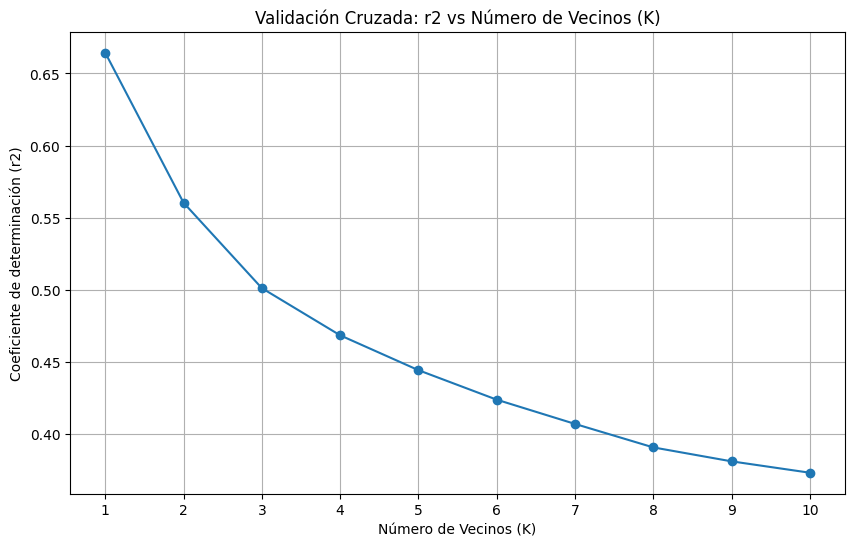

In [23]:
#Esta linea es innecesaria, es netamente para visualización y demostración
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o')
plt.title('Validación Cruzada: r2 vs Número de Vecinos (K)')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Coeficiente de determinación (r2)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [35]:
# Encontrar el mejor K
best_k = k_range[np.argmax(mean_scores)]
print(f'El mejor número de vecinos (K) es: {best_k}. Con un puntaje de {mean_scores[0]:.4f}')

El mejor número de vecinos (K) es: 1. Con un puntaje de 0.6587


In [36]:
final_knn = KNeighborsRegressor(n_neighbors=best_k)
red = final_knn.fit(rx_train, ry_train)

y_pred = red.predict(rx_test)
red_mse = mean_squared_error(ry_test, y_pred)
red_r2 = r2_score(ry_test, y_pred)

final_knn = KNeighborsRegressor(n_neighbors=best_k)
white = final_knn.fit(wx_train, wy_train)

y_pred = white.predict(wx_test)
white_mse = mean_squared_error(wy_test, y_pred)
white_r2 = r2_score(wy_test, y_pred)

In [37]:
print(f'Resultados Finales de Regresión lineal:\n\n'
     f'Vinos Rojos:\tMSE: {red_mse:.4f}\n'
     f'\t\tr2: {red_r2:.4f}\n'
     f'Vinos Blancos:\tMSE: {white_mse:.4f}\n'
     f'\t\tr2: {white_r2:.4f}\n')

Resultados Finales de Regresión lineal:

Vinos Rojos:	MSE: 0.1313
		r2: 0.8027
Vinos Blancos:	MSE: 0.1122
		r2: 0.8547



<h3 style="font-weight: bold">Clasificación:</h3>
&nbsp;&nbsp;&nbsp;&nbsp;Ahora ya calculados los valores como un problema de regresión, Continuaremos aplicando los modelos Knn y Svm para el caso de Vinos Rojos. Donde aplicaremos el mismo metodo donde evaluaremos esta vez solo los modelos KNN y SVM, luego escoger el mejor según los resultados y mejorarlo.

In [38]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(rx_train, ry_train)
y_pred = knn_classifier.predict(rx_test)

accuracy = accuracy_score(ry_test, y_pred)
conf_matrix = confusion_matrix(ry_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.6875
Confusion Matrix:
[[  0   2   2   0   0   0]
 [  1   2  10   6   1   0]
 [  2   8 207  43   5   0]
 [  0  11  58 180  12   1]
 [  0   0   6  22  51   0]
 [  0   0   2   3   5   0]]


In [39]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(rx_train, ry_train)
y_pred = svm_classifier.predict(rx_test)

accuracy = accuracy_score(ry_test, y_pred)
conf_matrix = confusion_matrix(ry_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5734375
Confusion Matrix:
[[  0   0   4   0   0   0]
 [  0   0  14   6   0   0]
 [  0   0 207  58   0   0]
 [  0   0 102 160   0   0]
 [  0   0   5  74   0   0]
 [  0   0   0  10   0   0]]


Con los resultados anteriores podemos ver el modelo que mejor rendimiento nos dio, que en esta caso también ha sido el modelo KNN. donde lo vamos a refinarlo un poco, nuevamente usando el Cross Validation para encontrar una cantidad K de vecinos que de el mejor porcentaje posible.

In [40]:
k_range = range(1, 11)
mean_scores = []

for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, rx_train, ry_train, cv=5, scoring='r2')
    mean_scores.append(np.mean(scores))

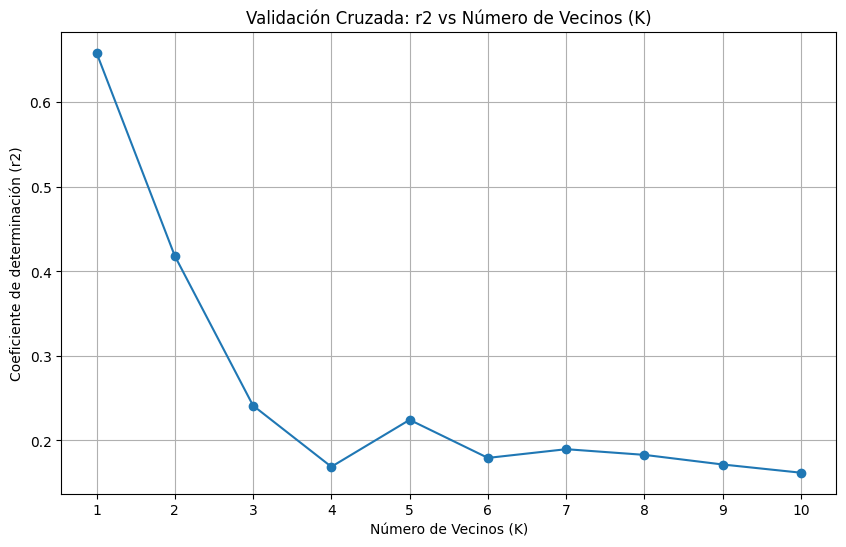

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o')
plt.title('Validación Cruzada: r2 vs Número de Vecinos (K)')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Coeficiente de determinación (r2)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [42]:
# Encontrar el mejor K
best_k = k_range[np.argmax(mean_scores)]
print(f'El mejor número de vecinos (K) es: {best_k}')

El mejor número de vecinos (K) es: 1


In [43]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
red = knn_final.fit(rx_train, ry_train)

y_pred = red.predict(rx_test)
red_accuracy = accuracy_score(ry_test, y_pred)
red_conf_matrix = confusion_matrix(ry_test, y_pred)

knn_final = KNeighborsClassifier(n_neighbors=best_k)
white = knn_final.fit(wx_train, wy_train)

y_pred = white.predict(wx_test)
white_accuracy = accuracy_score(wy_test, y_pred)
white_conf_matrix = confusion_matrix(wy_test, y_pred)

In [44]:
print(f'Resultados Finales de Clasificación:\n\n'
     f'MSE:\tVinos Rojos:\t {red_accuracy:.4f}\n'
     f'\tVinos Blancos:\t {white_accuracy:.4f}\n\n'
     f'Matriz de confusión:\n\n'
     f'\tVinos Rojos:\n {red_conf_matrix}\n\n'
     f'\tVinos Blancos:\n {white_conf_matrix}\n')

Resultados Finales de Clasificación:

MSE:	Vinos Rojos:	 0.9344
	Vinos Blancos:	 0.9378

Matriz de confusión:

	Vinos Rojos:
 [[  4   0   0   0   0   0]
 [  0  16   0   4   0   0]
 [  2   2 247  10   4   0]
 [  0   0   8 250   4   0]
 [  0   0   2   4  73   0]
 [  0   0   0   2   0   8]]

	Vinos Blancos:
 [[  6   0   0   0   0   0   0]
 [  0  56   4   0   2   0   0]
 [  0   0 561  32   6   2   0]
 [  0   0  12 843  12   8   0]
 [  0   0   8  28 307   2   0]
 [  0   0   0   0   6  62   0]
 [  0   0   0   0   0   0   3]]



<h3 style="font-weight: bold">Conclusión:</h3>
&nbsp;&nbsp;&nbsp;&nbsp;En este caso el modelo de los que evaluamos, nos funciono mejor el modelo Knn, donde si bien nos da unos buenos resultados, no sabemos hasta que punto este bien evaluado, pues los porcentajes son demasiado altos y varian demasiado. Creemos que el tratamiento de los datos afecto demasiado a la evaluación de los modelos, pues son muy pocos datos y se pudo haber profundizado más en este apartado, de igual forma no creemos que siga siendo un factor determinante para decir que los resultados estan totalmente mal.